In [22]:
%matplotlib inline

import sqlite3
from dataclasses import dataclass, field

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

from release import count_release_files, Release


con = sqlite3.connect('main.db')


In [23]:

project_name = 'flask'

sql = f'''
select tag, date(creator_dt)
from projects join releases on projects.id = releases.project_id
where name = '{project_name}'
order by 2
'''
raw_releases = con.execute(sql).fetchall()

raw_releases = [Release(tag, date) for tag,date in raw_releases]
print(f'{len(raw_releases)=}')
# assert 0, [raw_releases[:3]]


len(raw_releases)=38


AssertionError: 

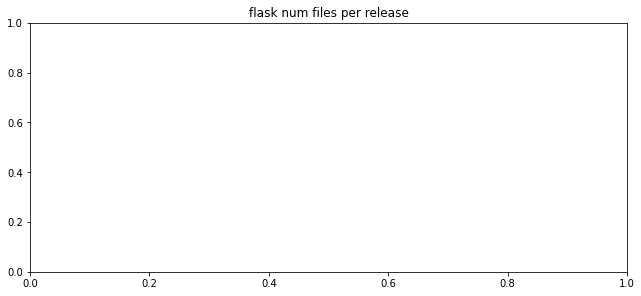

In [28]:

# Create figure
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title=f"{project_name} num files per release")

proj_dir = Path('../SOURCE') / project_name
count_release_files(proj_dir, '1.0')
sns.lineplot(x=[0, 1], y=[1, 2])
# sns.lineplot(x="timepoint", y="signal",
#              hue="region", style="event",
#              data=fmri)


In [ ]:

# dates = [rel.date for rel in releases]
# if 1:
#         # The vertical stems.
#         ax.vlines(dates, 0, levels, color="tab:red")  

# # Baseline and markers on it.
# ax.plot(dates, np.zeros_like(dates), "-o",
#         color="k", markerfacecolor="w")  

# # annotate lines
# line_style = dict(textcoords="offset points",
#                         horizontalalignment="right")
# major_style = dict(
#         size=10, ha="center", va="center",
#         bbox=dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
# )
# for num,rel in enumerate(releases):
#         level = raw_levels[num % len(raw_levels)]
#         valign = "bottom" if level > 0 else "top"
#         xytext = (-3, np.sign(level)*3)
#         ax.annotate(rel.majormin, xy=(rel.date, level),
#                         xytext=xytext,
#                         verticalalignment=valign,
#                         **line_style)

# # major releases get big blue circle
# major_pat = re.compile(r'([0-9]+)\.0')
# for rel in releases:
#         match = major_pat.match(rel.majormin)
#         if not match:
#                 continue
#         label = match.group(1)  # "major" (no minor nor micro)
#         ax.text(rel.date, 0, label, **major_style)

# # format xaxis with intervals
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
# plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# # remove y axis and spines
# ax.yaxis.set_visible(False)
# ax.spines[["left", "top", "right"]].set_visible(False)

# ax.margins(y=0.1)
# plt.show()